# 特徵選取

## 載入套件

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import datasets
import matplotlib.pyplot as plt

## 載入糖尿病診斷資料集

In [2]:
X, y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## 線性迴歸及分析報告

In [3]:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              5.100
Date:                Fri, 28 Feb 2025   Prob (F-statistic):                    4.72e-07
Time:                        06:43:21   Log-Likelihood:                         -2873.9
No. Observations:                 442   AIC:                                      5768.
Df Residuals:                     432   BIC:                                      5809.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 結論：分析報告只有bmi特徵效果較顯著(P<0.05)

## 使用 Scikit_learn 驗證

In [4]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X, y)

RandomForestClassifier()

In [5]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
column_list = X.columns.to_list().copy()
for f in indices:
    print(f"{f+1:02d} {column_list[f]:20s} {importances[f]:.4f}")

03 bmi                  0.1273
09 s5                   0.1228
06 s2                   0.1160
04 bp                   0.1110
05 s1                   0.1104
01 age                  0.1095
07 s3                   0.1080
10 s6                   0.1077
08 s4                   0.0601
02 sex                  0.0271


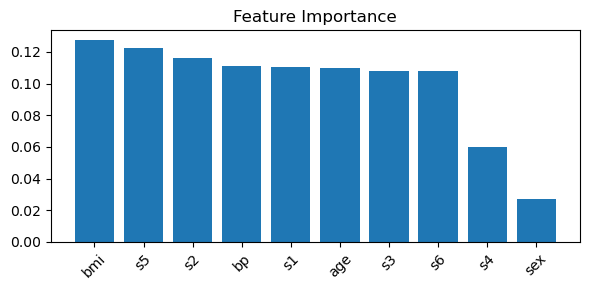

In [6]:
plt.figure(figsize=(6,3))
plt.title('Feature Importance')
plt.bar(range(len(importances)), 
        importances[indices],
        align='center')

plt.xticks(range(len(importances)), 
           np.array(column_list)[indices], rotation=45)
plt.tight_layout()
plt.show()